<a href="https://colab.research.google.com/github/pks98/NLP_Reviews/blob/main/under_sampling_over_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [81]:
df=pd.read_csv("final_reviews.csv")
df.head()

,Review_Title,Reviews,Rating
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5
1,Enjoy while it lasts,This is the second time I am writing this revi...,2
2,Good,1. Quite good look2. Better noise cancellation...,4
3,not great,its a good set of ear buds but1. the quality o...,1
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5


In [82]:
df=df[df["Rating"]!=3]

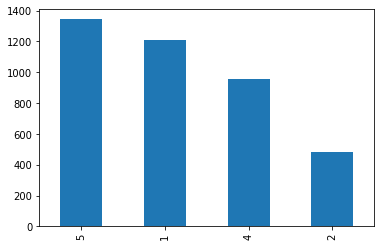

In [83]:
df['Rating'].value_counts().plot(kind='bar');

In [84]:
def data_clean(text):
  if text=='The media could not be loaded.':
    return " "
  else:
    return text

In [85]:
df['Reviews']=df['Reviews'].apply(data_clean)

In [86]:
df.fillna('',inplace=True)

In [87]:
df['text']=df['Review_Title']+' '+df['Reviews']

In [88]:
df.sample(5)

,Review_Title,Reviews,Rating,text
3233,No Noise Cancellation & won't work after a year,The product may look fancy with nominal price....,1,No Noise Cancellation & won't work after a yea...
70,An honest review (2 days usage) (edited after ...,Got them in prime day sale (blue colour)Using ...,4,An honest review (2 days usage) (edited after ...
244,"It's fine, wireless and looks modern, that's a...",Love the battery life. I'm quite new to the TW...,4,"It's fine, wireless and looks modern, that's a..."
2591,Not enough good,Don't buy . I purchase this product in ₹2000 ....,2,Not enough good Don't buy . I purchase this pr...
4144,Good budget tws earbuds,"Good bass effect. But a bit bulky in size, hen...",4,Good budget tws earbuds Good bass effect. But ...


In [89]:
def rating_classify(rating):
  if rating>=4:
    return 1
  else:
    return 0

In [90]:
df['label']=df['Rating'].apply(rating_classify)

In [91]:
df.shape

(3987, 5)

In [92]:
df.head()

,Review_Title,Reviews,Rating,text,label
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5,AWESOME...IN LOVE WITH IT ! Really impressed w...,1
1,Enjoy while it lasts,This is the second time I am writing this revi...,2,Enjoy while it lasts This is the second time I...,0
2,Good,1. Quite good look2. Better noise cancellation...,4,Good 1. Quite good look2. Better noise cancell...,1
3,not great,its a good set of ear buds but1. the quality o...,1,not great its a good set of ear buds but1. the...,0
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5,Best buds in the budget with Type C I have bee...,1


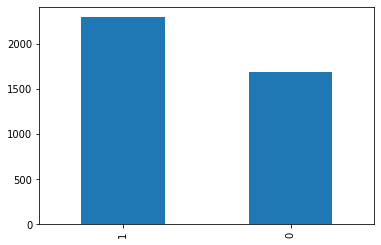

In [93]:
df['label'].value_counts().plot(kind='bar');

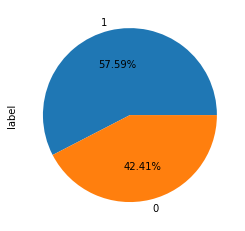

In [94]:
df['label'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [95]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
port_stem=PorterStemmer()
def text_processing(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [97]:
df['text']=df['text'].apply(text_processing)

In [98]:
df.drop(['Review_Title','Reviews'],axis=1,inplace=True)

In [99]:
df.sample(5)

,Rating,text,label
2057,5,great product fantast product use music watch ...,1
1219,1,worst custom servic get better product within ...,0
116,1,left ear bud make unbear static nois buy retur...,0
3174,4,best price use product week want tell experi a...,1
4454,1,connect issu u r call either normal call whats...,0


In [100]:
tf=TfidfVectorizer(max_features=3000)
cv=CountVectorizer()
x=tf.fit_transform(df['text']).toarray()
y=df['label'].values

In [101]:
# from imblearn.under_sampling import NearMiss

# nm = NearMiss()
# X_res,y_res=nm.fit_sample(x,y)

# x,y=nm.fit_resample(x,y)

In [102]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# x, y = rus.fit_resample(x, y)

In [103]:
#before under sampling

# x.shape,y.shape

In [104]:
x.shape,y.shape

((3987, 3000), (3987,))

In [105]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x, y = ros.fit_resample(x, y)

In [106]:
x.shape,y.shape

((4592, 3000), (4592,))

In [107]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [109]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier( random_state=2)
abc = AdaBoostClassifier(random_state=2)
bc = BaggingClassifier(random_state=2)
etc = ExtraTreesClassifier(random_state=2)
gbdt = GradientBoostingClassifier(random_state=2)
xgb = XGBClassifier(random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    
    return accuracy

In [112]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    accuracy_scores.append(current_accuracy)

In [113]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy
0,SVC,0.872688
8,ETC,0.869423
5,RF,0.866159
4,LR,0.853101
9,GBDT,0.847661
7,BgC,0.846572
2,NB,0.841132
10,xgb,0.840044
3,DT,0.836779
6,AdaBoost,0.820457


In [114]:
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
 
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       485
           1       0.83      0.87      0.85       434

    accuracy                           0.85       919
   macro avg       0.85      0.85      0.85       919
weighted avg       0.85      0.85      0.85       919



In [130]:
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
 
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       485
           1       0.83      0.90      0.86       434

    accuracy                           0.87       919
   macro avg       0.87      0.87      0.87       919
weighted avg       0.87      0.87      0.87       919



In [131]:
import pickle

pickle.dump(etc,open('etc_model.pkl','wb'))

In [136]:
model.predict(x_test[10].reshape(1,-1))

array([1])

In [138]:
y_test[10]

1

In [135]:
model.predict_proba(x_test[10].reshape(1,-1))

array([[0.26, 0.74]])